# Data Analisys

In [52]:
library(ggplot2)


## Load Data


In [53]:
data <- read.csv("source.csv")

In [54]:
dim(data)

[1] 1000   26

In [55]:
head(data)

,index,Patient.Id,Age,Gender,Air.Pollution,Alcohol.use,Dust.Allergy,OccuPational.Hazards,Genetic.Risk,chronic.Lung.Disease,⋯,Fatigue,Weight.Loss,Shortness.of.Breath,Wheezing,Swallowing.Difficulty,Clubbing.of.Finger.Nails,Frequent.Cold,Dry.Cough,Snoring,Level
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,P1,33,1,2,4,5,4,3,2,⋯,3,4,2,2,3,1,2,3,4,Low
2,1,P10,17,1,3,1,5,3,4,2,⋯,1,3,7,8,6,2,1,7,2,Medium
3,2,P100,35,1,4,5,6,5,5,4,⋯,8,7,9,2,1,4,6,7,2,High
4,3,P1000,37,1,7,7,7,7,6,7,⋯,4,2,3,1,4,5,6,7,5,High
5,4,P101,46,1,6,8,7,7,7,6,⋯,3,2,4,1,4,2,4,2,3,High
6,5,P102,35,1,4,5,6,5,5,4,⋯,8,7,9,2,1,4,6,7,2,High


In [56]:
colSums(is.na(data))

index               Patient.Id                      Age 
                       0                        0                        0 
                  Gender            Air.Pollution              Alcohol.use 
                       0                        0                        0 
            Dust.Allergy     OccuPational.Hazards             Genetic.Risk 
                       0                        0                        0 
    chronic.Lung.Disease            Balanced.Diet                  Obesity 
                       0                        0                        0 
                 Smoking           Passive.Smoker               Chest.Pain 
                       0                        0                        0 
       Coughing.of.Blood                  Fatigue              Weight.Loss 
                       0                        0                        0 
     Shortness.of.Breath                 Wheezing    Swallowing.Difficulty 
                       0                        0                        0 
Clubbing.of.Finger.Nails            Frequent.Cold                Dry.Cough 
                       0                        0                        0 
                 Snoring                    Level 
                       0                        0

In [57]:
summary(data)

     index        Patient.Id             Age            Gender     
 Min.   :  0.0   Length:1000        Min.   :14.00   Min.   :1.000  
 1st Qu.:249.8   Class :character   1st Qu.:27.75   1st Qu.:1.000  
 Median :499.5   Mode  :character   Median :36.00   Median :1.000  
 Mean   :499.5                      Mean   :37.17   Mean   :1.402  
 3rd Qu.:749.2                      3rd Qu.:45.00   3rd Qu.:2.000  
 Max.   :999.0                      Max.   :73.00   Max.   :2.000  
 Air.Pollution   Alcohol.use     Dust.Allergy   OccuPational.Hazards
 Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.00        
 1st Qu.:2.00   1st Qu.:2.000   1st Qu.:4.000   1st Qu.:3.00        
 Median :3.00   Median :5.000   Median :6.000   Median :5.00        
 Mean   :3.84   Mean   :4.563   Mean   :5.165   Mean   :4.84        
 3rd Qu.:6.00   3rd Qu.:7.000   3rd Qu.:7.000   3rd Qu.:7.00        
 Max.   :8.00   Max.   :8.000   Max.   :8.000   Max.   :8.00        
  Genetic.Risk  chronic.Lung.Disease Bala

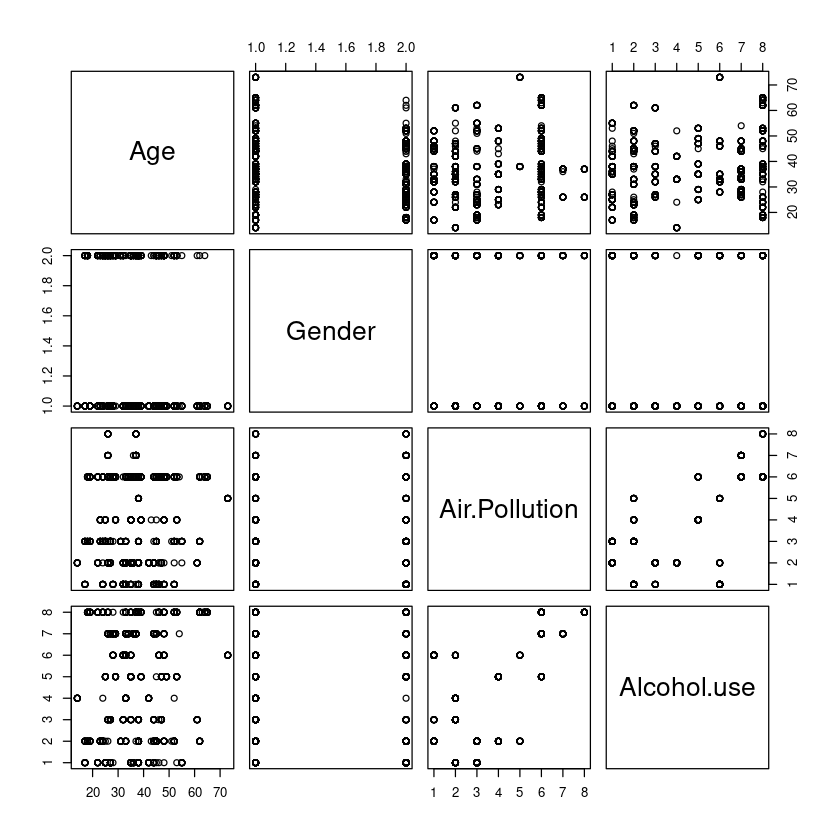

In [58]:
pairs(data[, c("Age", "Gender", "Air.Pollution", "Alcohol.use")])  

## Preprocesing

### Delete metainfo

In [59]:
data[, c("Patient.Id", "index")] <- NULL


In [60]:
cols_continious <- sapply(data, is.numeric)
print(cols_continious)

                     Age                   Gender            Air.Pollution 
                    TRUE                     TRUE                     TRUE 
             Alcohol.use             Dust.Allergy     OccuPational.Hazards 
                    TRUE                     TRUE                     TRUE 
            Genetic.Risk     chronic.Lung.Disease            Balanced.Diet 
                    TRUE                     TRUE                     TRUE 
                 Obesity                  Smoking           Passive.Smoker 
                    TRUE                     TRUE                     TRUE 
              Chest.Pain        Coughing.of.Blood                  Fatigue 
                    TRUE                     TRUE                     TRUE 
             Weight.Loss      Shortness.of.Breath                 Wheezing 
                    TRUE                     TRUE                     TRUE 
   Swallowing.Difficulty Clubbing.of.Finger.Nails            Frequent.Cold 
            

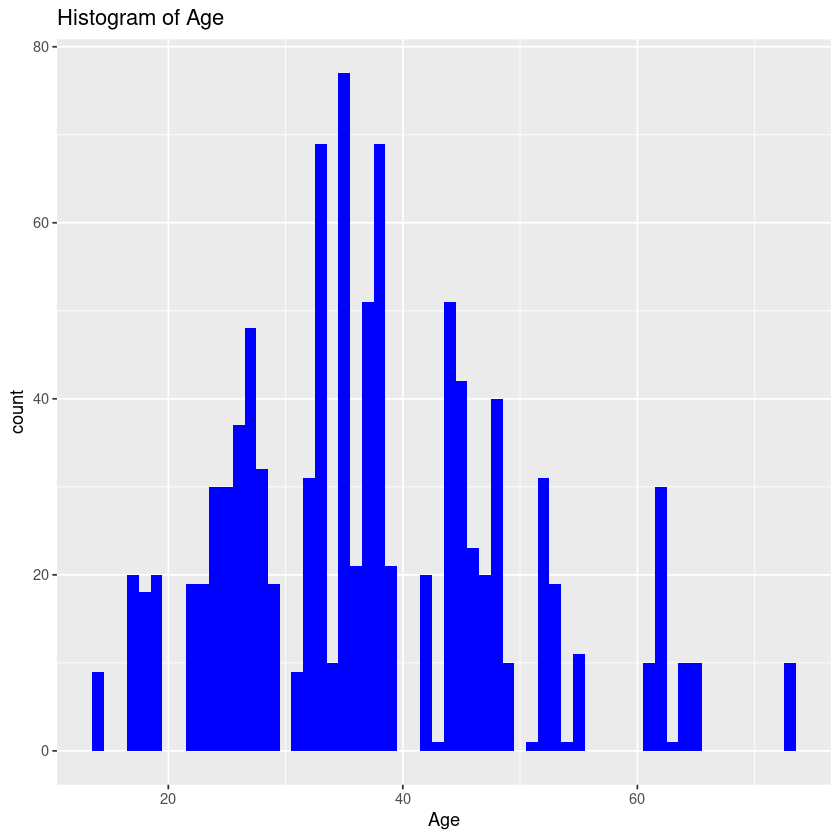

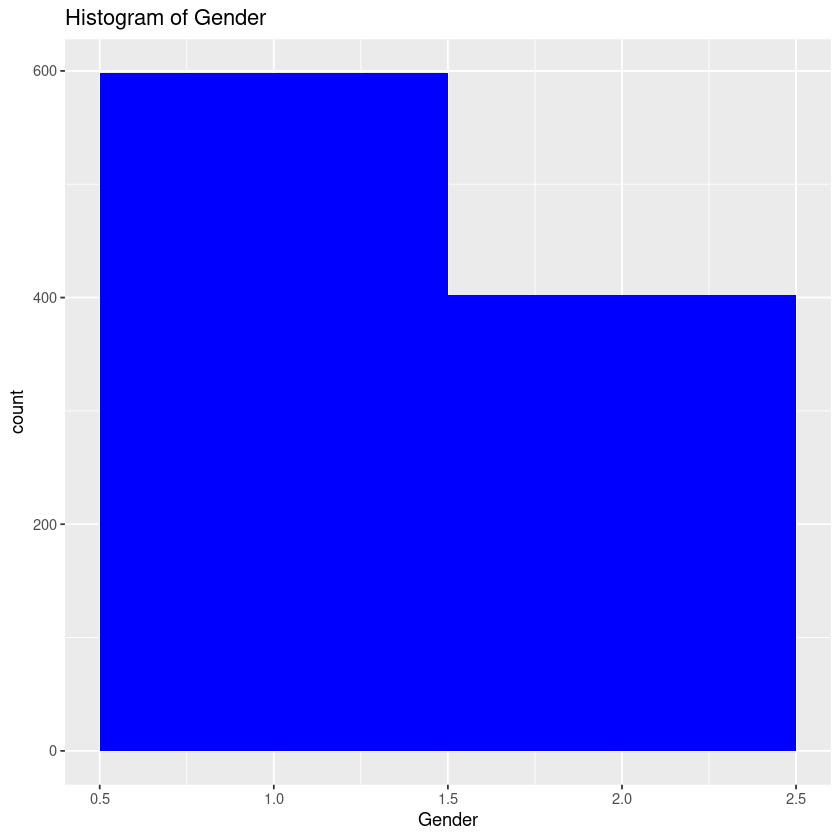

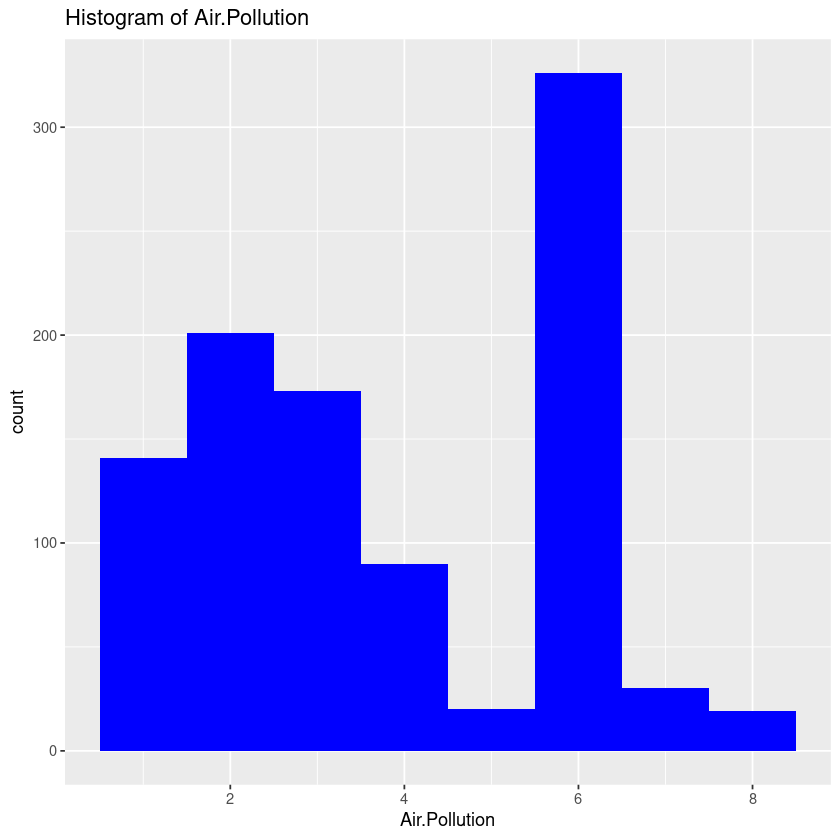

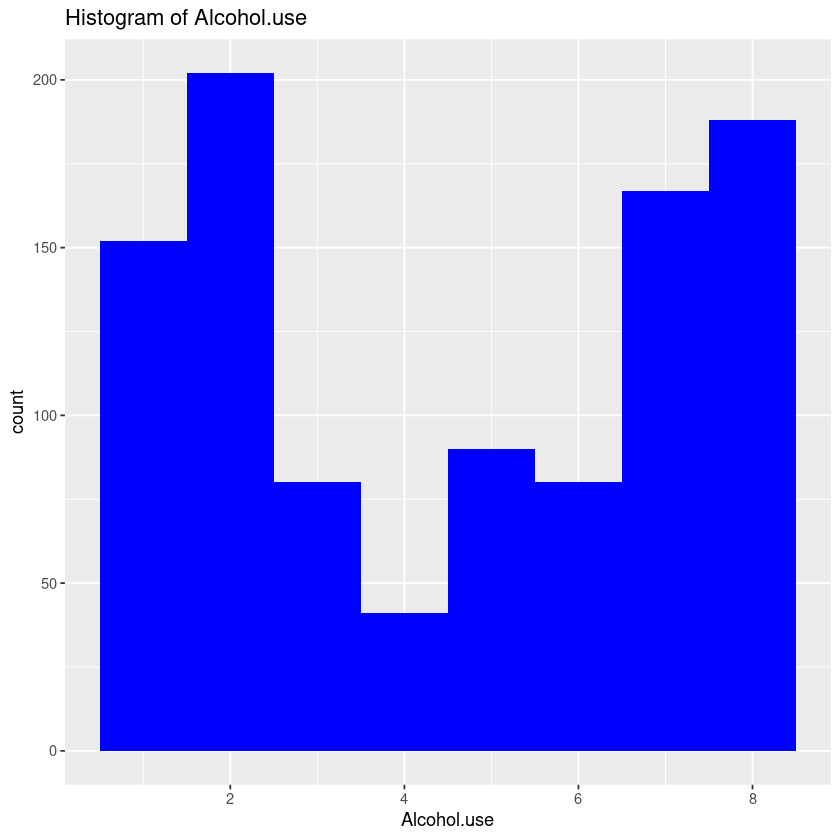

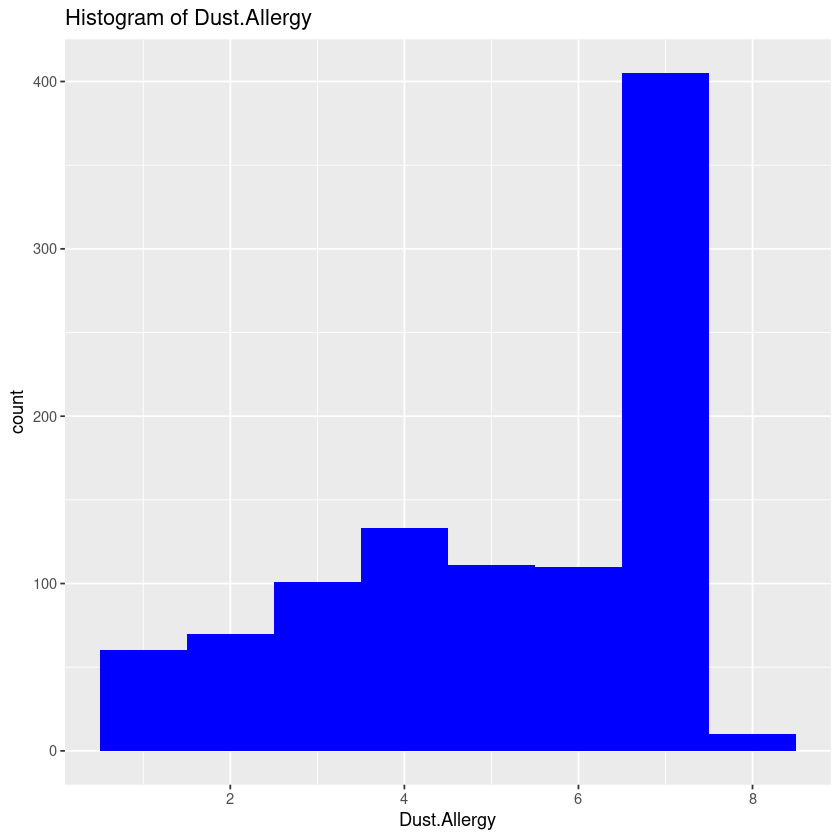

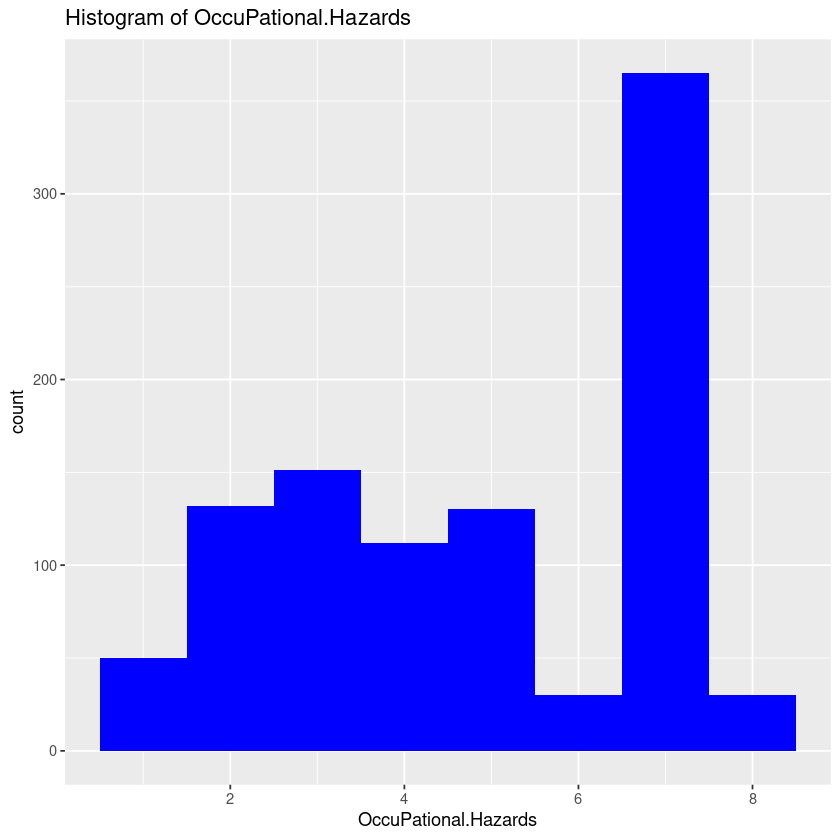

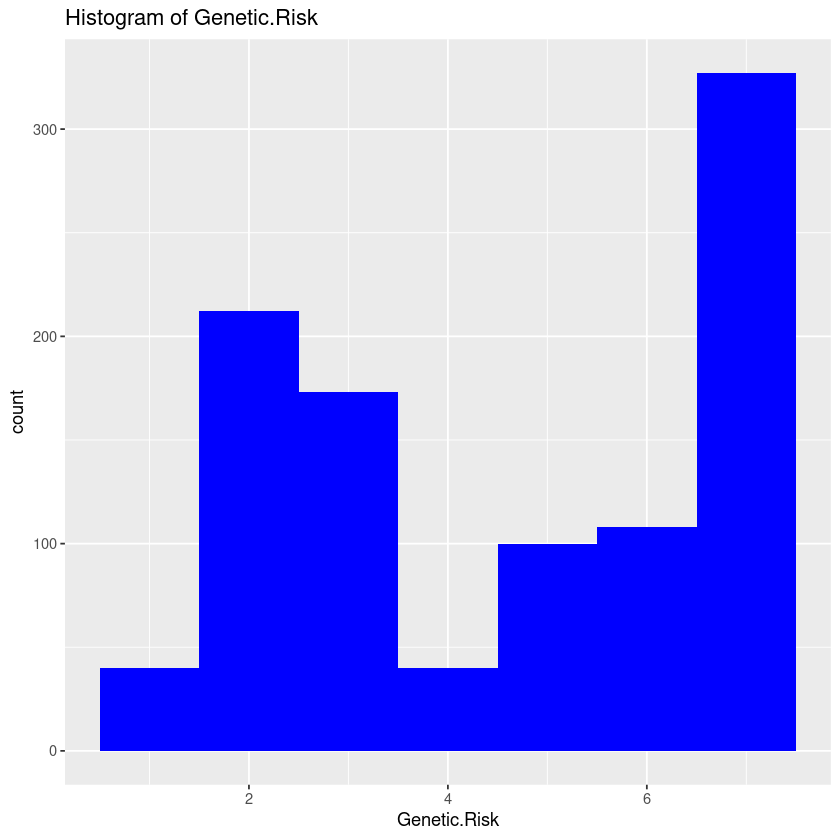

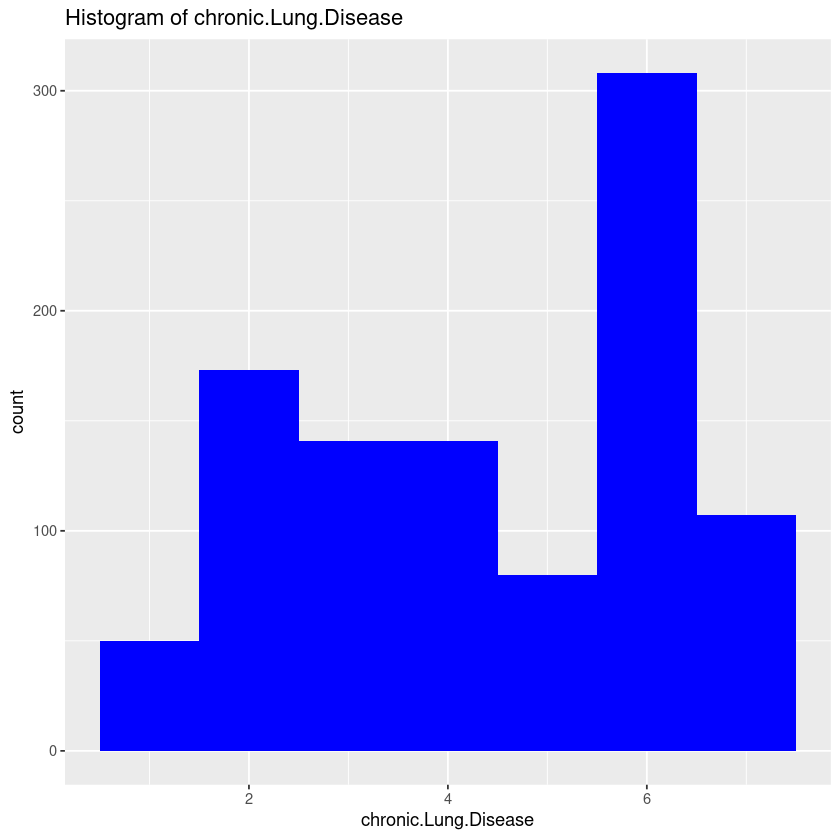

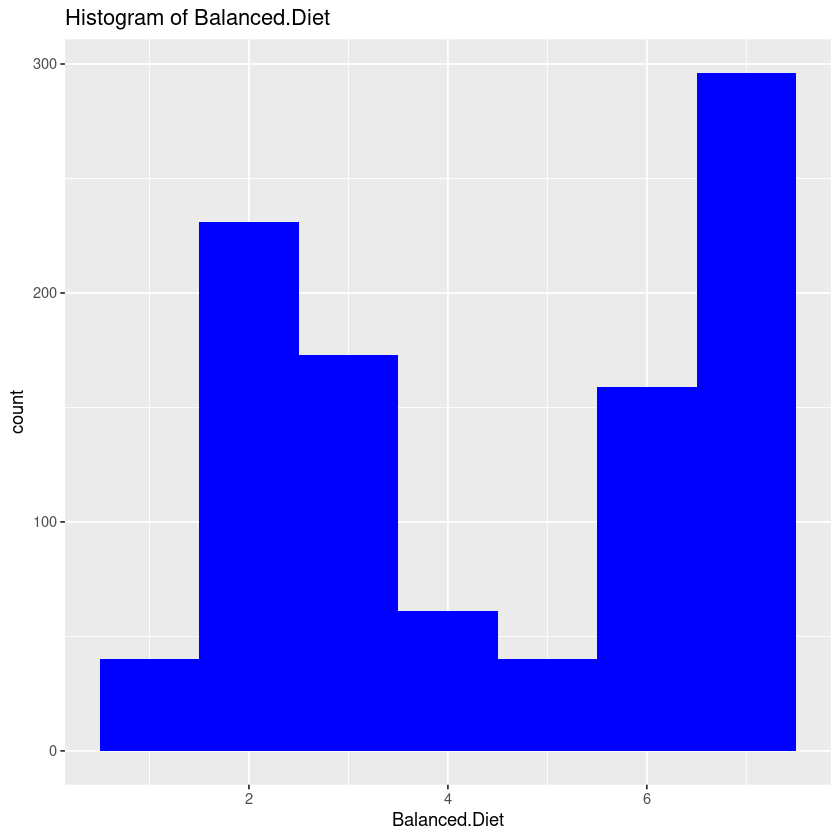

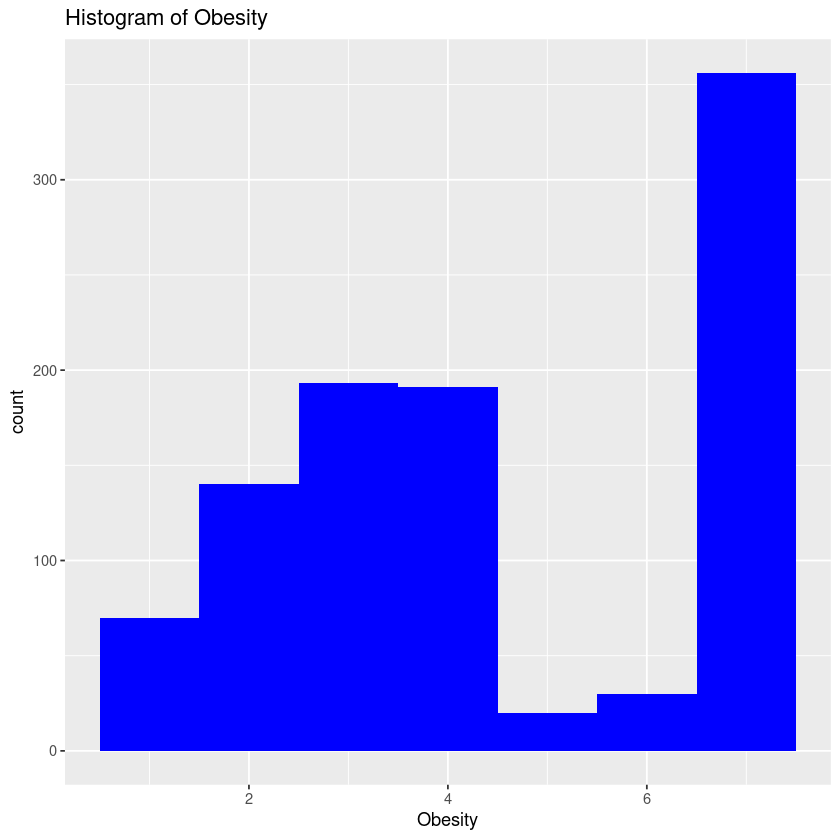

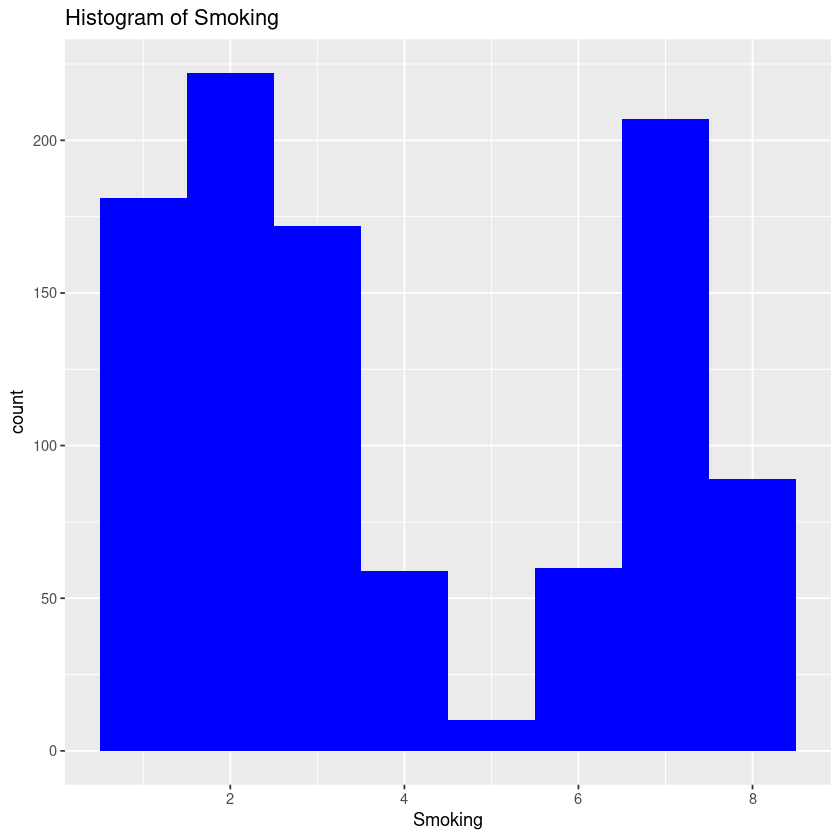

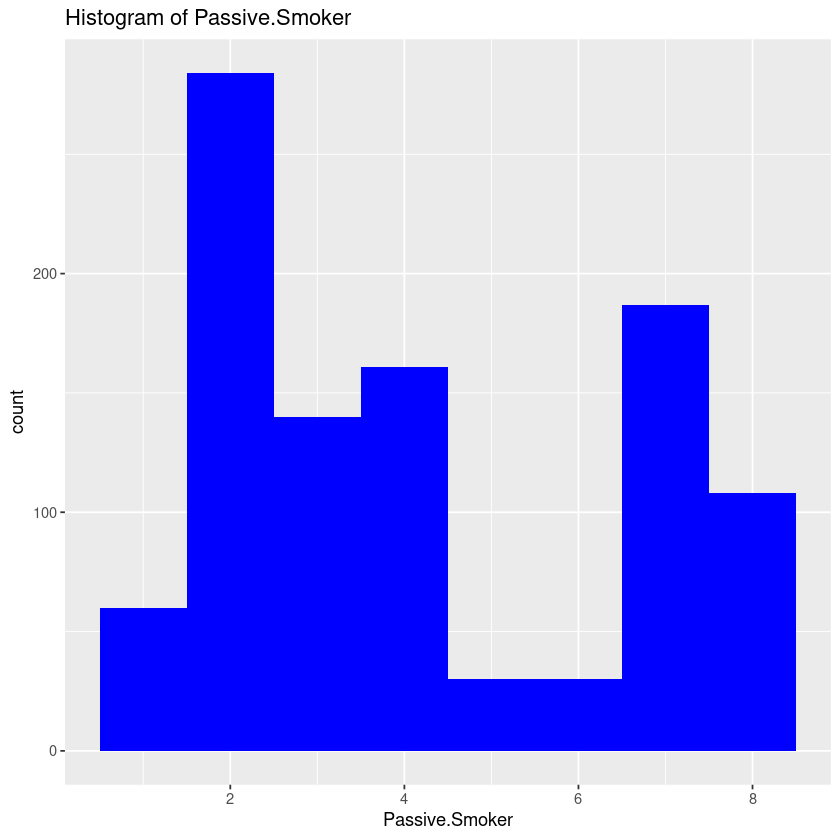

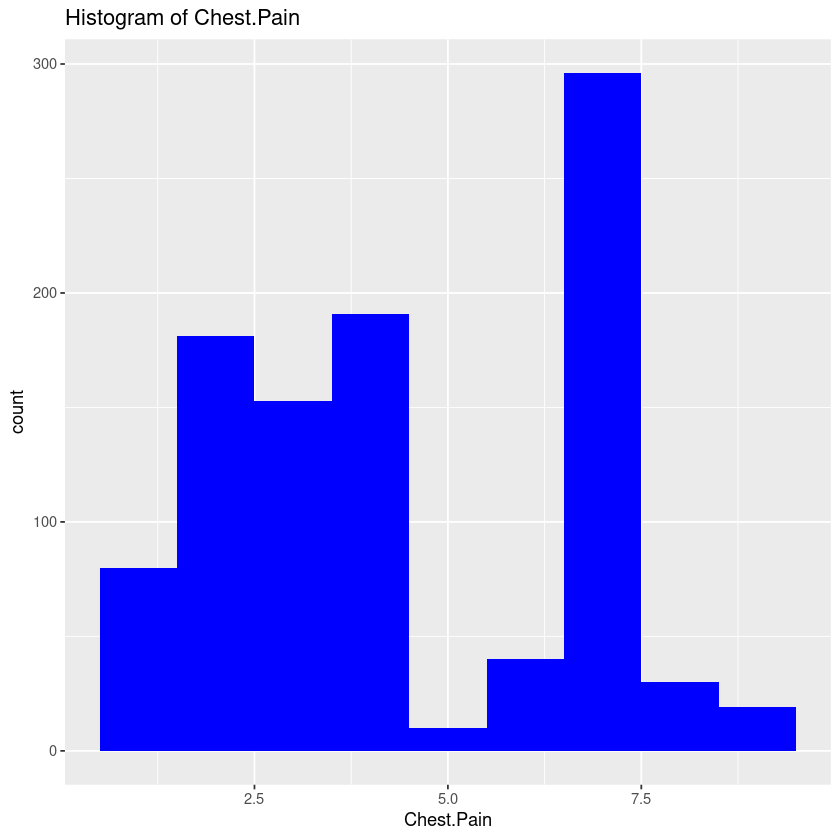

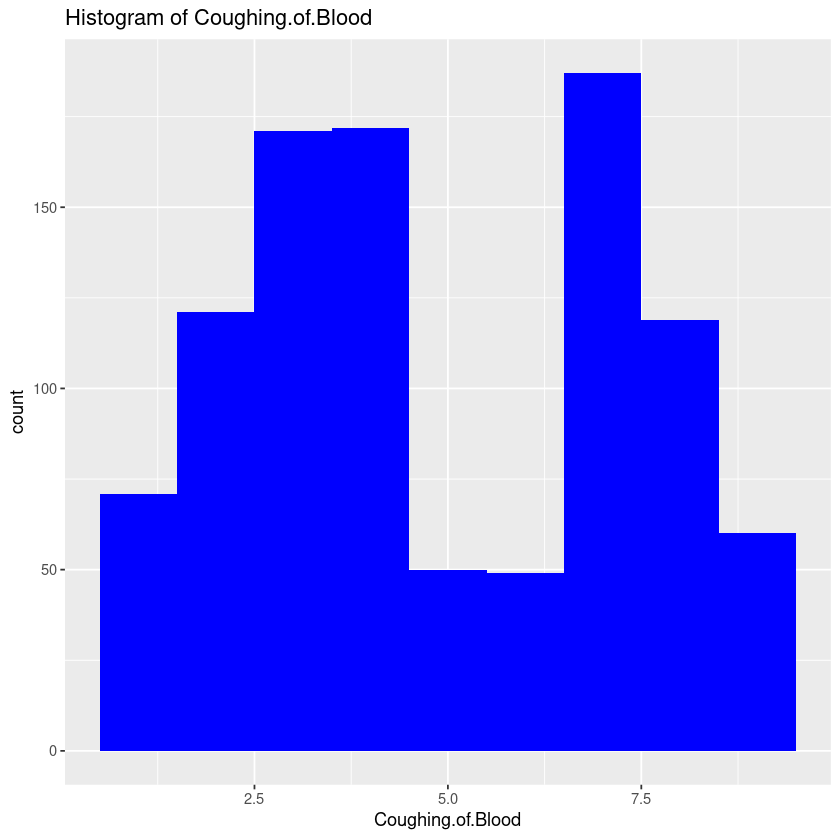

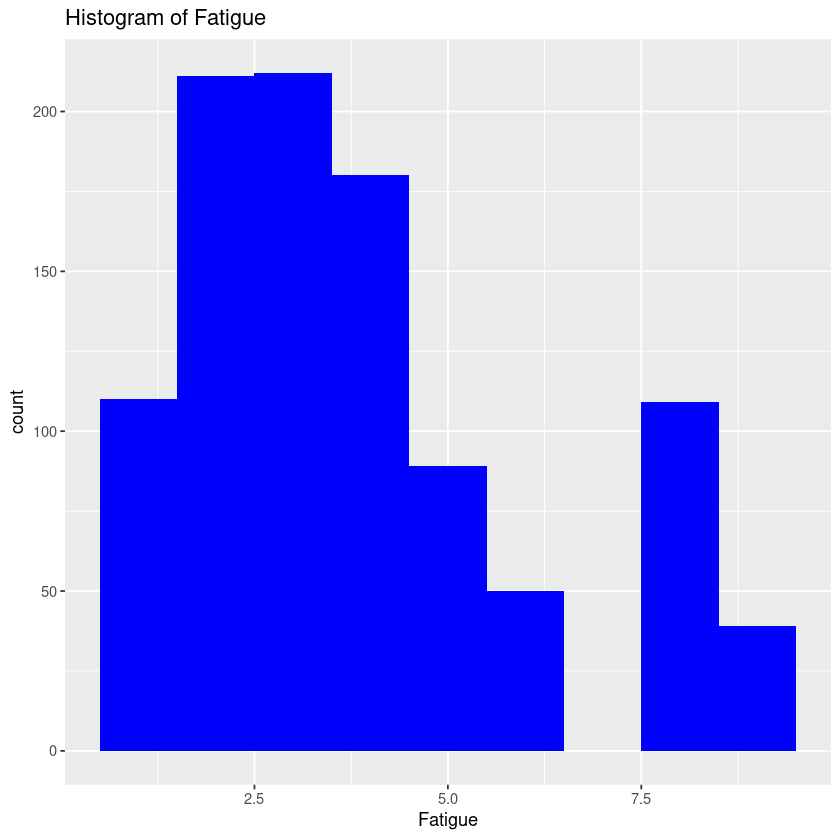

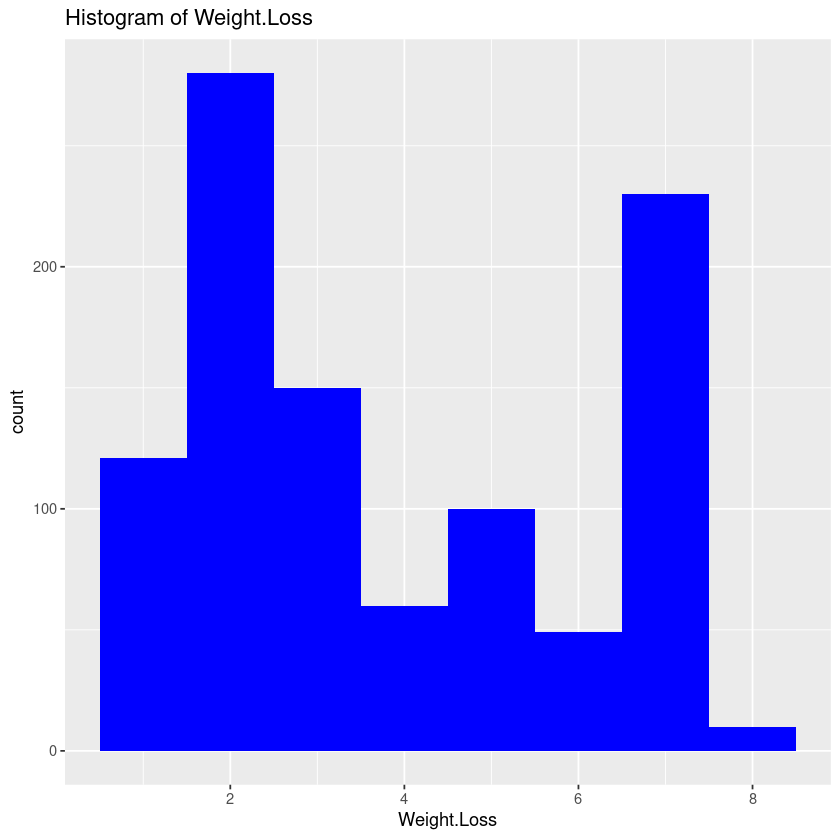

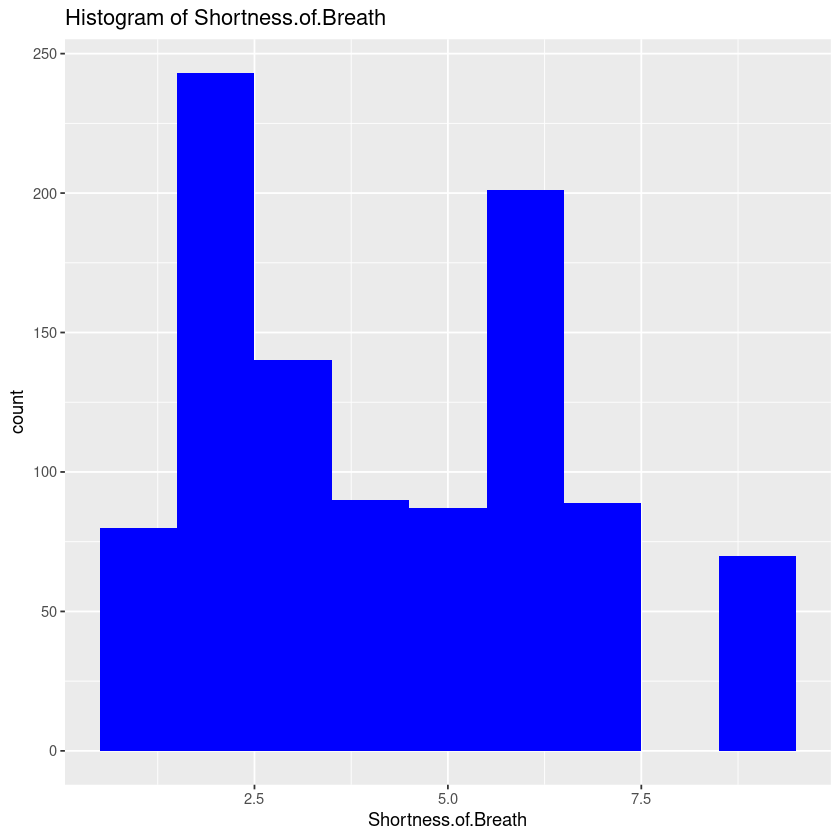

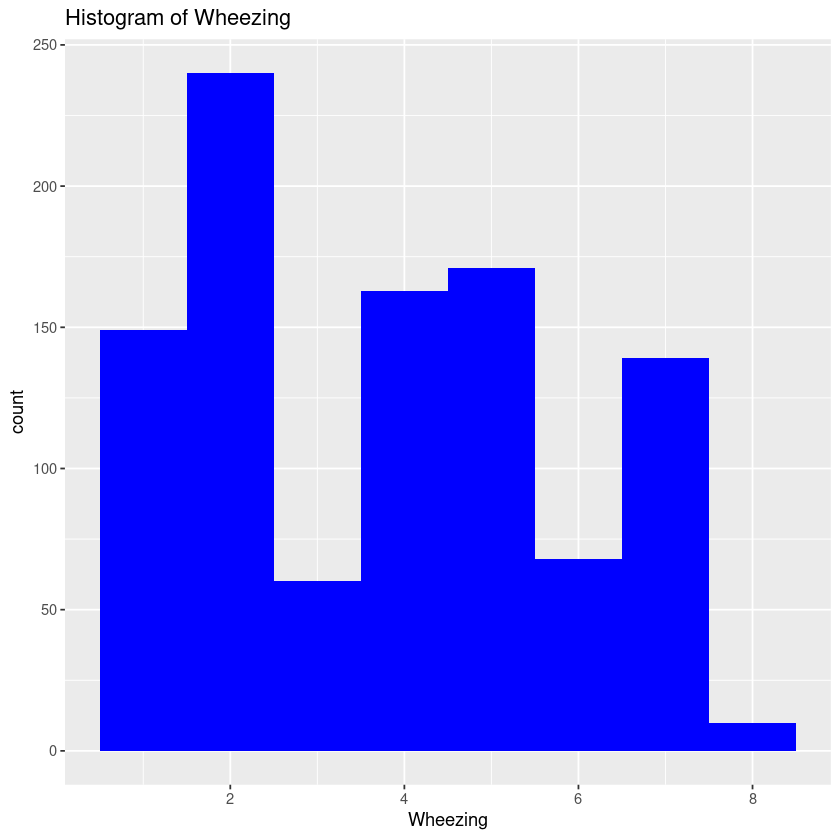

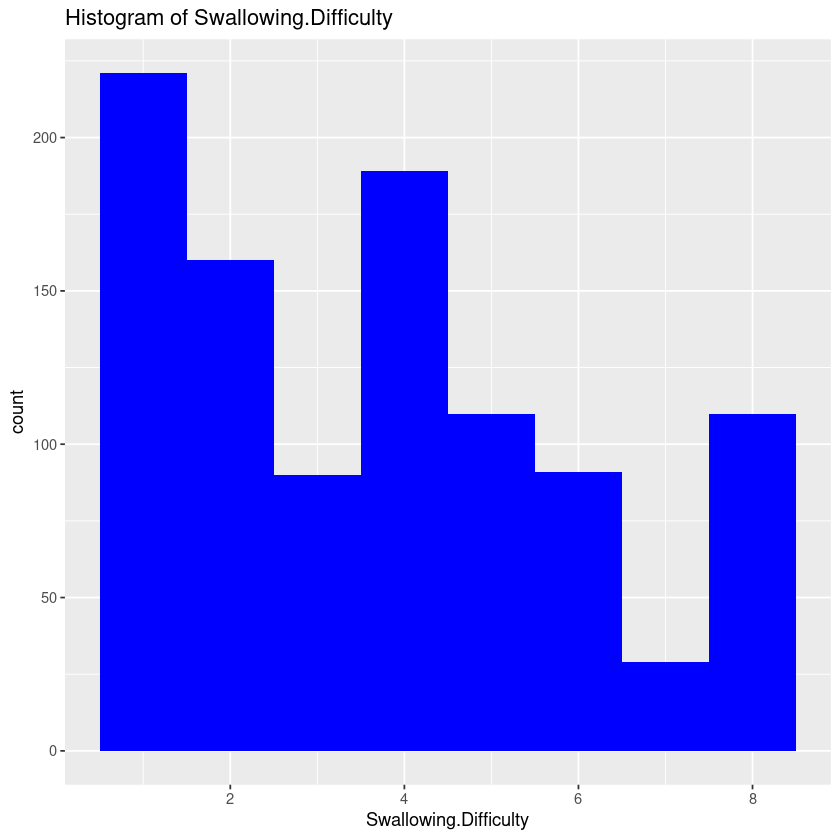

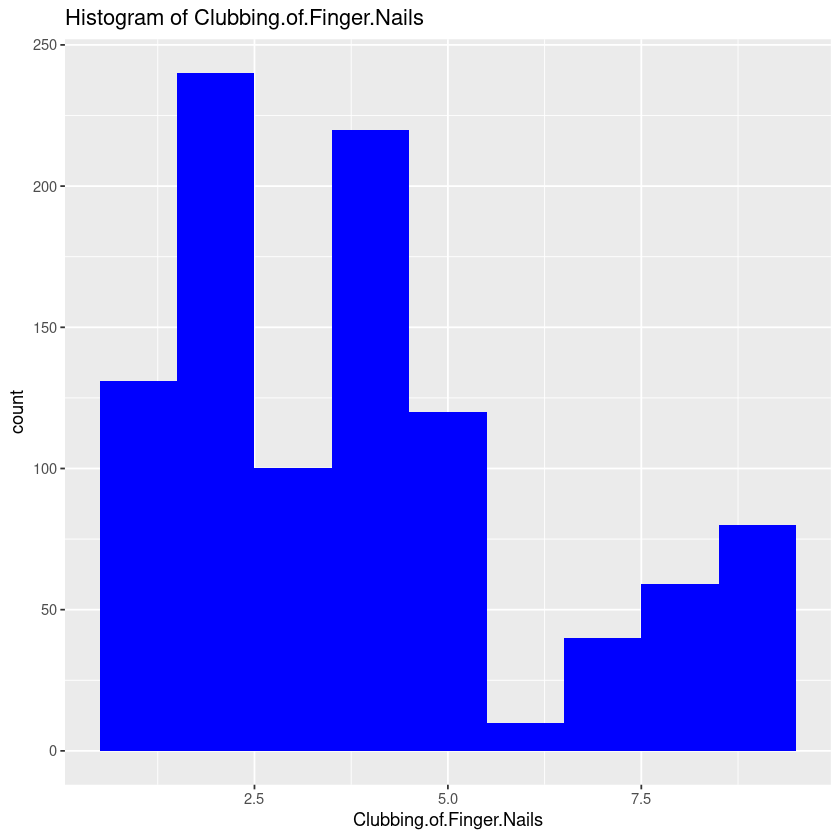

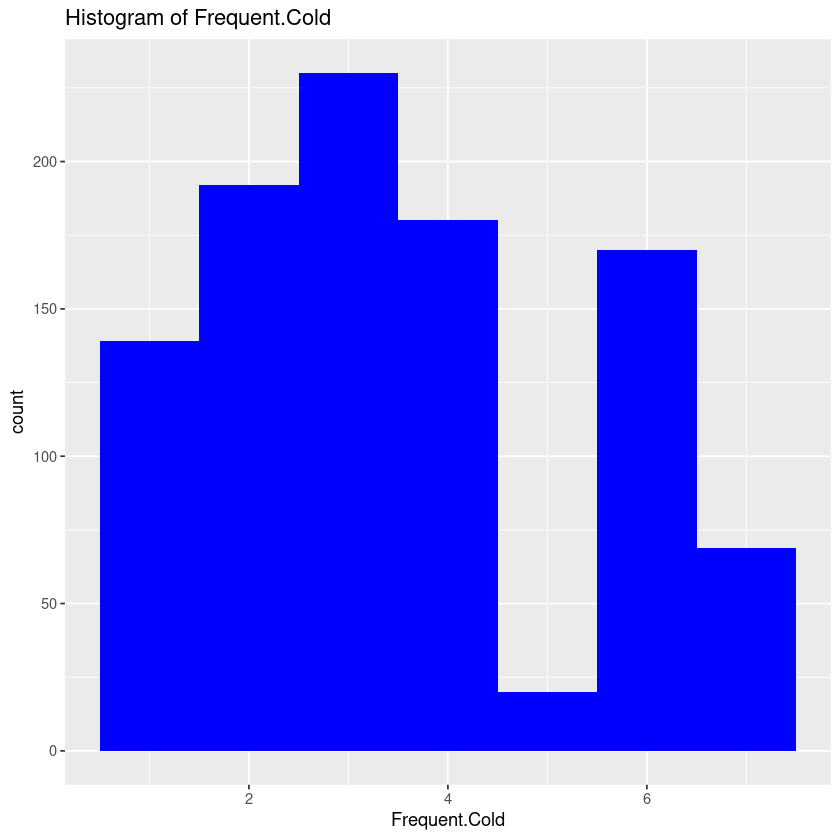

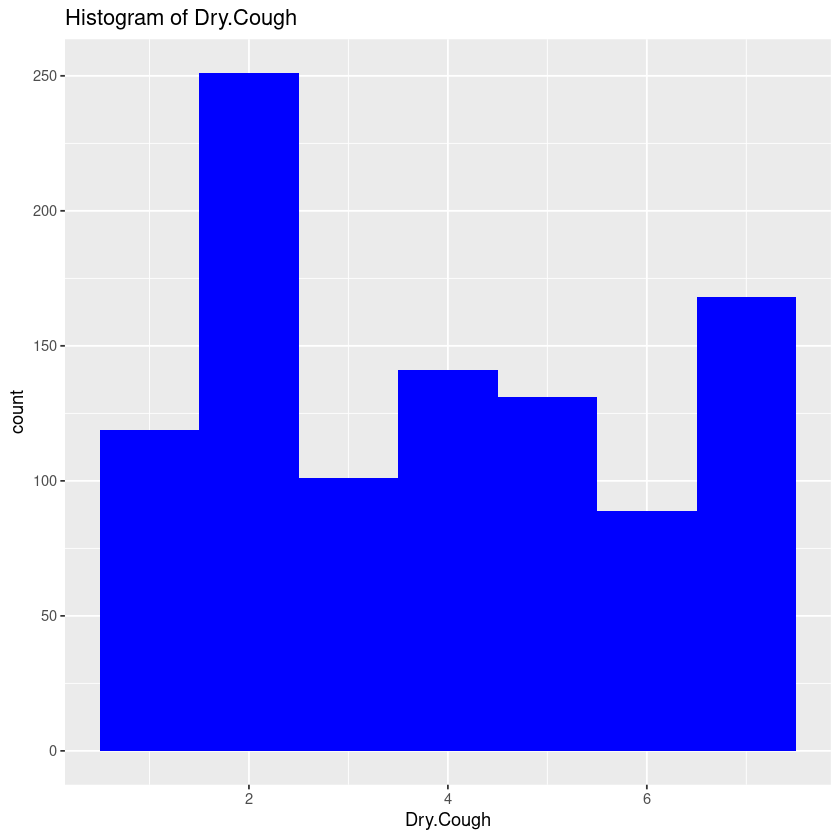

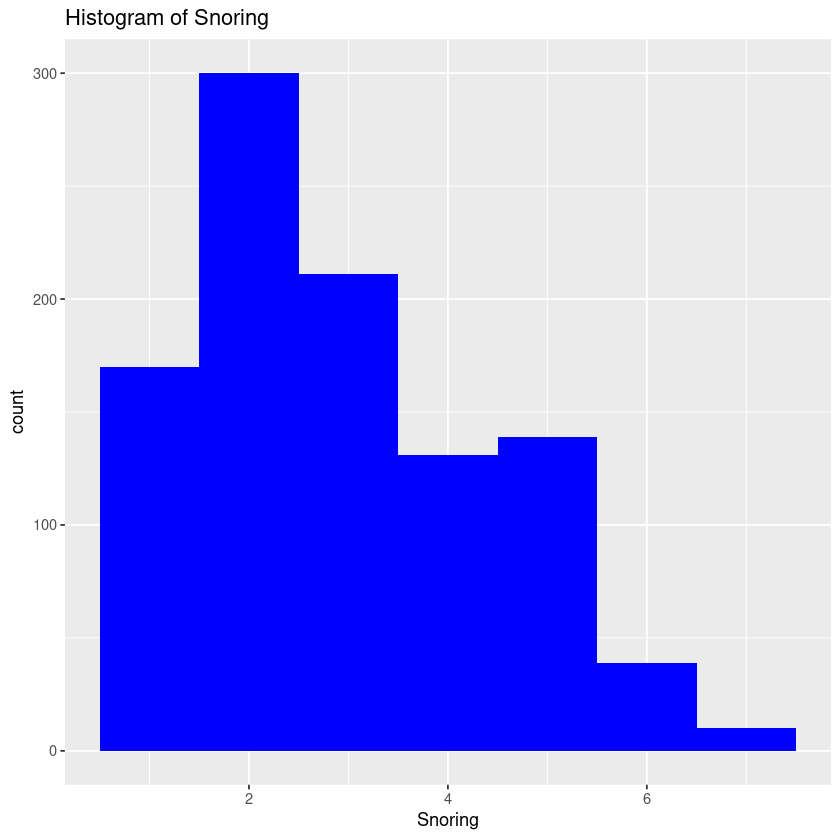

In [61]:

for (col_name in names(data)[cols_continious]) {
  hist_plot <- ggplot(data, aes(x = .data[[col_name]])) +
    geom_histogram(binwidth = 1, fill = "blue") +  # Ajusta el ancho del bin según tus datos
    labs(title = paste("Histogram of", col_name))
  
  print(hist_plot)
}

In [62]:
head(data$Level)

[1] "Low"    "Medium" "High"   "High"   "High"   "High"

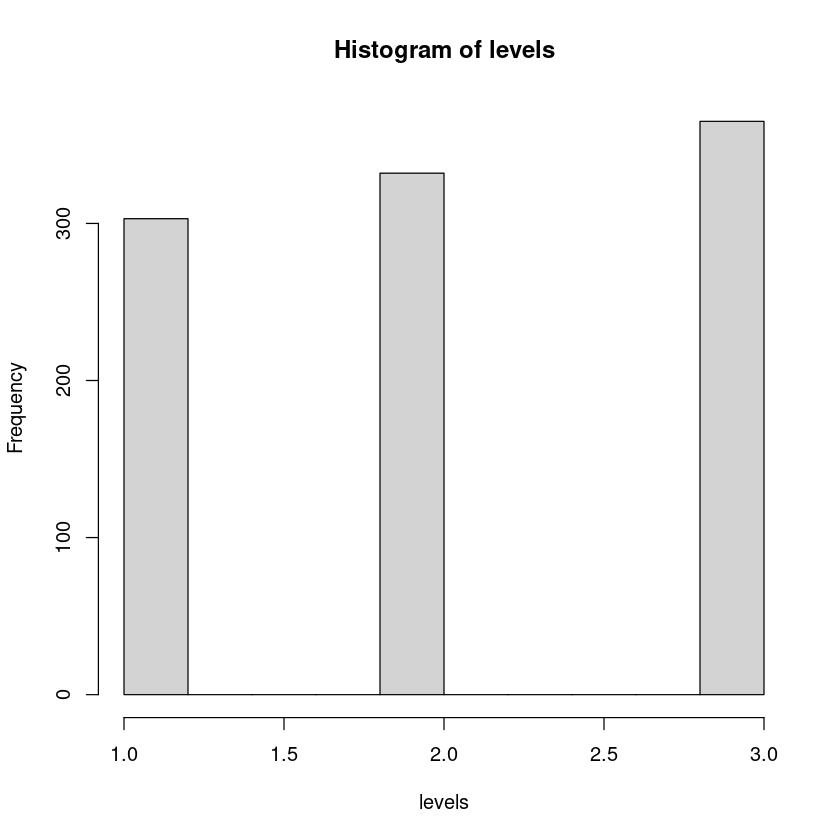

In [63]:
levels <- as.numeric(factor(data$Level, levels = unique(data$Level)))
hist(levels)


In [64]:
data$Level <- levels

In [65]:
write.csv(data, file = "ds-final.csv", row.names=FALSE)